<a href="https://colab.research.google.com/github/TharuniI/ImageClassification/blob/main/ML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

---

**Problem:** How can we improve existing image classification models to effectively categorize objects in images into 10 unique labels?

**Approach:** Through experimentalize studies, compare different styles, architectures, and variables of a model to determine the best results. Focusing on the activation function and optimizer, we will isolate these and determine the best of its kind after determining the best architectural style.

**Dataset:** CIFAR10 - 60 000 images in total

This project is done by:

*   Tharuni Iranjan - 100694352
*   Setu Patel - 100701301


# Loading in Data

In [ ]:
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.datasets as datasets
import tensorflow.keras.losses as losses
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.utils as utils

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Loading in the Data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
#Normalize the pixles 
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#Plotting function to view any overfitting
#Built from the code from the TensorFlowT Tutorial on the TensorFlow website at: https://www.tensorflow.org/tutorials/images/classification
def plot_overfitting(log,epochs):
  acc = log.history['accuracy']
  val_acc = log.history['val_accuracy']

  loss = log.history['loss']
  val_loss = log.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

# Base Convnet Model

In [ ]:
#BASE CONV2D MODEL

base_convnet = models.Sequential([
                                  
    layers.Conv2D(32,kernel_size=(3,3), padding='same', input_shape=(32, 32,3)),
    layers.MaxPooling2D(pool_size=(3,3), strides=3),

    layers.Conv2D(16,kernel_size=(3,3), padding='same'),
    layers.MaxPooling2D(pool_size=(3,3), strides=3),
    
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
], name="Base_Convnet")

base_convnet.compile(
    optimizer = optimizers.Adam(),
    loss = losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
base_convnet.summary()

Model: "Base_Convnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 10, 10, 16)        4624      
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 3, 3, 16)         0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 144)               0         
                                                                 
 dense_29 (Dense)            (None, 10)               

Epoch 1/5
1094/1094 [==============================] - 40s 36ms/step - loss: 1.7222 - accuracy: 0.3835 - val_loss: 1.5660 - val_accuracy: 0.4467
Epoch 2/5
1094/1094 [==============================] - 38s 35ms/step - loss: 1.3987 - accuracy: 0.5102 - val_loss: 1.3666 - val_accuracy: 0.5197
Epoch 3/5
1094/1094 [==============================] - 38s 35ms/step - loss: 1.2894 - accuracy: 0.5509 - val_loss: 1.2839 - val_accuracy: 0.5551
Epoch 4/5
1094/1094 [==============================] - 38s 35ms/step - loss: 1.2277 - accuracy: 0.5741 - val_loss: 1.2453 - val_accuracy: 0.5687
Epoch 5/5
1094/1094 [==============================] - 38s 35ms/step - loss: 1.1814 - accuracy: 0.5899 - val_loss: 1.1972 - val_accuracy: 0.5879


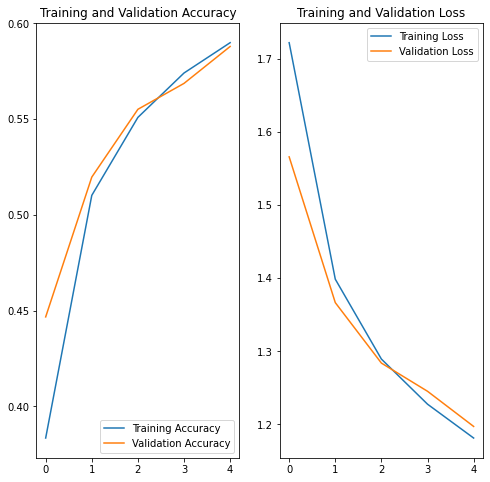

In [ ]:
plot_overfitting(base_convnet.fit(x_train, y_train, validation_split=0.3, epochs=5),5)

In [ ]:
test_loss, test_acc = base_convnet.evaluate(x_test, y_test)
test_acc

313/313 [==============================] - 3s 11ms/step - loss: 1.1851 - accuracy: 0.5919


0.5918999910354614

# Improvements to the Base Convnet Model


---



The following are all modifications made to the Base Convnet Model, each were trained and evaluated to determine the best results. 

The VGG Model with Activation yeilded the best results and will continue foward to proceed with more testing.

In [ ]:
#Deeper convnet model: More Conv2D Layers
deeper_convnet = models.Sequential([
                                  
    layers.Conv2D(32,kernel_size=(3,3), padding='same', input_shape=(32, 32,3)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64,kernel_size=(3,3), padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(64,kernel_size=(3,3), padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
], name="Deeper_Convnet")

deeper_convnet.compile(
    optimizer = optimizers.Adam(),
    loss = losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
deeper_convnet.summary()

Model: "Deeper_Convnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_83 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 4, 4, 64)      

Epoch 1/5
1094/1094 [==============================] - 87s 79ms/step - loss: 1.5407 - accuracy: 0.4526 - val_loss: 1.1965 - val_accuracy: 0.5837
Epoch 2/5
1094/1094 [==============================] - 86s 79ms/step - loss: 1.2030 - accuracy: 0.5807 - val_loss: 1.1127 - val_accuracy: 0.6143
Epoch 3/5
1094/1094 [==============================] - 86s 79ms/step - loss: 1.0877 - accuracy: 0.6248 - val_loss: 1.0473 - val_accuracy: 0.6430
Epoch 4/5
1094/1094 [==============================] - 86s 79ms/step - loss: 1.0024 - accuracy: 0.6567 - val_loss: 0.9743 - val_accuracy: 0.6639
Epoch 5/5
1094/1094 [==============================] - 87s 79ms/step - loss: 0.9399 - accuracy: 0.6799 - val_loss: 1.0080 - val_accuracy: 0.6603


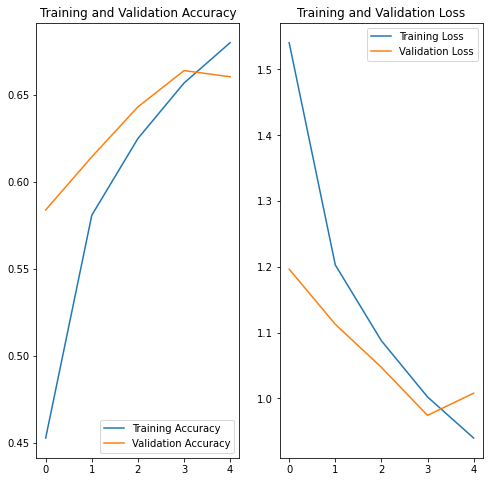

In [ ]:
plot_overfitting(deeper_convnet.fit(x_train, y_train, validation_split=0.3, epochs=5),5)

In [ ]:
test_loss, test_acc = deeper_convnet.evaluate(x_test, y_test)
test_acc

313/313 [==============================] - 6s 20ms/step - loss: 1.0234 - accuracy: 0.6558


0.6557999849319458



---



In [ ]:
#VGG Style architecture: 3 VGG Blocks
VGG_convnet = models.Sequential([
                                  
    layers.Conv2D(32,kernel_size=(3,3), padding='same', input_shape=(32, 32,3)),
    layers.Conv2D(32,kernel_size=(3,3), padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64,kernel_size=(3,3), padding='same'),
    layers.Conv2D(64,kernel_size=(3,3), padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(128,kernel_size=(3,3), padding='same'),
    layers.Conv2D(128,kernel_size=(3,3), padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
], name="VGG_Convnet")

VGG_convnet.compile(
    optimizer = optimizers.Adam(),
    loss = losses.SparseCategoricalCrossentropy(),
    metrics = ['sparse_categorical_accuracy','accuracy']
)

In [ ]:
VGG_convnet.summary()

Model: "VGG_Convnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                   

Epoch 1/5
1094/1094 [==============================] - 273s 249ms/step - loss: 1.4603 - sparse_categorical_accuracy: 0.4882 - accuracy: 0.4882 - val_loss: 1.1426 - val_sparse_categorical_accuracy: 0.6035 - val_accuracy: 0.6035
Epoch 2/5
1094/1094 [==============================] - 273s 250ms/step - loss: 1.1433 - sparse_categorical_accuracy: 0.6099 - accuracy: 0.6099 - val_loss: 1.0370 - val_sparse_categorical_accuracy: 0.6474 - val_accuracy: 0.6474
Epoch 3/5
1094/1094 [==============================] - 275s 251ms/step - loss: 1.0215 - sparse_categorical_accuracy: 0.6501 - accuracy: 0.6501 - val_loss: 1.0543 - val_sparse_categorical_accuracy: 0.6455 - val_accuracy: 0.6455
Epoch 4/5
1094/1094 [==============================] - 277s 253ms/step - loss: 0.9472 - sparse_categorical_accuracy: 0.6824 - accuracy: 0.6824 - val_loss: 0.9914 - val_sparse_categorical_accuracy: 0.6625 - val_accuracy: 0.6625
Epoch 5/5
1094/1094 [==============================] - 278s 254ms/step - loss: 0.8675 - spar

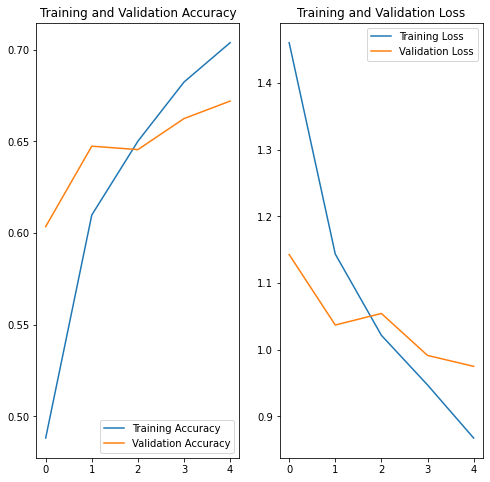

In [ ]:
plot_overfitting(VGG_convnet.fit(x_train, y_train, validation_split=0.3, epochs=5),5)

In [ ]:
VGG_convnet.evaluate(x_test, y_test)

313/313 [==============================] - 19s 60ms/step - loss: 0.9607 - sparse_categorical_accuracy: 0.6719 - accuracy: 0.6719


[0.9607115983963013, 0.6718999743461609, 0.6718999743461609]



---



In [ ]:
#VGG Style architecture: 3 VGG Blocks and using an activation on each Conv2D layer
#Relu Activation
activation_VGG_convnet = models.Sequential([
                                  
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='relu', input_shape=(32, 32,3)),
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='relu'),
    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='relu'),
    layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
], name="VGG_with_Activation")

activation_VGG_convnet.compile(
    optimizer = optimizers.Adam(),
    loss = losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
activation_VGG_convnet.summary()

Model: "VGG_with_Activation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                           

Epoch 1/5
1094/1094 [==============================] - 277s 253ms/step - loss: 1.6561 - accuracy: 0.3856 - val_loss: 1.3213 - val_accuracy: 0.5162
Epoch 2/5
1094/1094 [==============================] - 276s 253ms/step - loss: 1.2672 - accuracy: 0.5475 - val_loss: 1.1535 - val_accuracy: 0.5857
Epoch 3/5
1094/1094 [==============================] - 277s 253ms/step - loss: 1.0811 - accuracy: 0.6197 - val_loss: 0.9423 - val_accuracy: 0.6689
Epoch 4/5
1094/1094 [==============================] - 279s 255ms/step - loss: 0.9585 - accuracy: 0.6652 - val_loss: 0.9302 - val_accuracy: 0.6733
Epoch 5/5
1094/1094 [==============================] - 279s 256ms/step - loss: 0.8581 - accuracy: 0.7015 - val_loss: 0.8605 - val_accuracy: 0.7017


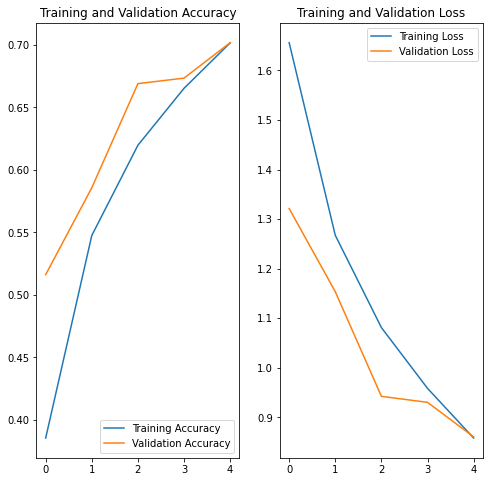

In [ ]:
plot_overfitting(activation_VGG_convnet.fit(x_train, y_train, validation_split=0.3, epochs=5),5)

In [ ]:
activation_VGG_convnet.evaluate(x_test, y_test)

313/313 [==============================] - 19s 59ms/step - loss: 0.8929 - accuracy: 0.6886


[0.8928704857826233, 0.6886000037193298]

# Selecting Activation Function


---



The VGG model with activation will now be tested with multiple activation functions to determine which will give the best results. 

The Elu activation proved to yeild the best results, thus moving foward to determine the best optimizer function.

In [ ]:
#VGG Style architecture: 3 VGG Blocks and using an activation on each Conv2D layer
#Sigmoid Activation - Expected to perform poorly due to sigmoid's domain being [0,1]

sigmoid_VGG_convnet = models.Sequential([
                                  
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='sigmoid', input_shape=(32, 32,3)),
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='sigmoid'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='sigmoid'),
    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='sigmoid'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='sigmoid'),
    layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='sigmoid'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='sigmoid'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
], name="VGG_with_Sigmoid")

sigmoid_VGG_convnet.compile(
    optimizer = optimizers.Adam(),
    loss = losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

Epoch 1/5
1094/1094 [==============================] - 283s 258ms/step - loss: 2.3104 - accuracy: 0.0969 - val_loss: 2.3027 - val_accuracy: 0.0979
Epoch 2/5
1094/1094 [==============================] - 280s 256ms/step - loss: 2.3030 - accuracy: 0.0962 - val_loss: 2.3028 - val_accuracy: 0.0984
Epoch 3/5
1094/1094 [==============================] - 281s 257ms/step - loss: 2.3048 - accuracy: 0.0994 - val_loss: 2.3032 - val_accuracy: 0.0983
Epoch 4/5
1094/1094 [==============================] - 281s 257ms/step - loss: 2.3034 - accuracy: 0.0996 - val_loss: 2.3031 - val_accuracy: 0.0979
Epoch 5/5
1094/1094 [==============================] - 282s 258ms/step - loss: 2.3035 - accuracy: 0.0988 - val_loss: 2.3033 - val_accuracy: 0.0979


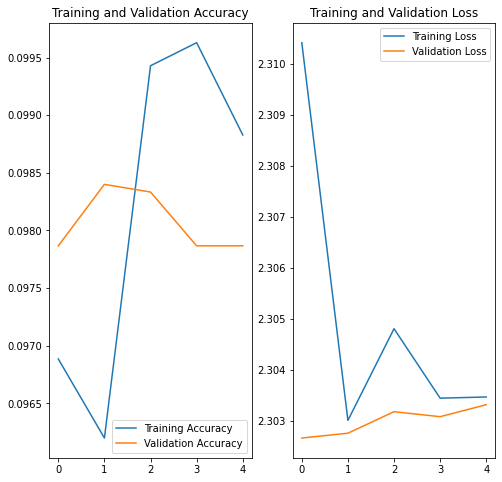

In [ ]:
plot_overfitting(sigmoid_VGG_convnet.fit(x_train, y_train, validation_split=0.3, epochs=5),5)

In [ ]:
sigmoid_VGG_convnet.evaluate(x_test, y_test)

313/313 [==============================] - 19s 61ms/step - loss: 2.3027 - accuracy: 0.1000


[2.3026814460754395, 0.10000000149011612]



---



In [ ]:
#VGG Style architecture: 3 VGG Blocks and using an activation on each Conv2D layer
#Selu Activation
selu_VGG_convnet = models.Sequential([
                                  
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='selu', input_shape=(32, 32,3)),
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='selu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='selu'),
    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='selu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='selu'),
    layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='selu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='selu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
], name="VGG_with_Selu")

selu_VGG_convnet.compile(
    optimizer = optimizers.Adam(),
    loss = losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

Epoch 1/5
1094/1094 [==============================] - 296s 270ms/step - loss: 1.5469 - accuracy: 0.4638 - val_loss: 1.1837 - val_accuracy: 0.5955
Epoch 2/5
1094/1094 [==============================] - 297s 272ms/step - loss: 1.2080 - accuracy: 0.5854 - val_loss: 1.0819 - val_accuracy: 0.6329
Epoch 3/5
1094/1094 [==============================] - 297s 272ms/step - loss: 1.0681 - accuracy: 0.6314 - val_loss: 1.0239 - val_accuracy: 0.6471
Epoch 4/5
1094/1094 [==============================] - 297s 271ms/step - loss: 0.9898 - accuracy: 0.6563 - val_loss: 1.0506 - val_accuracy: 0.6390
Epoch 5/5
1094/1094 [==============================] - 296s 271ms/step - loss: 0.9440 - accuracy: 0.6735 - val_loss: 0.9236 - val_accuracy: 0.6883


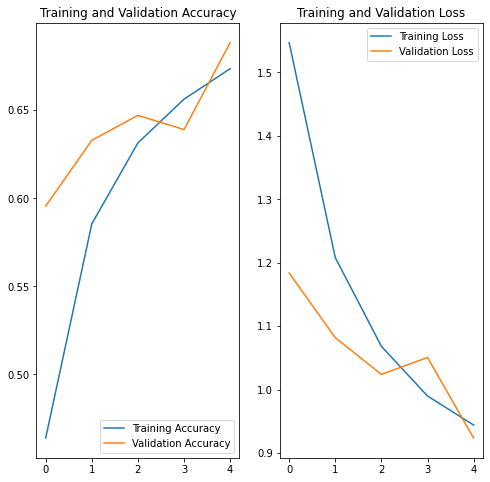

In [ ]:
plot_overfitting(selu_VGG_convnet.fit(x_train, y_train, validation_split=0.3, epochs=5),5)

In [ ]:
selu_VGG_convnet.evaluate(x_test, y_test)

313/313 [==============================] - 20s 65ms/step - loss: 0.9347 - accuracy: 0.6848


[0.9347384572029114, 0.6848000288009644]



---



In [ ]:
#VGG Style architecture: 3 VGG Blocks and using an activation on each Conv2D layer
#Elu Activation
elu_VGG_convnet = models.Sequential([
                                  
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='elu', input_shape=(32, 32,3)),
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='elu'),
    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='elu'),
    layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
], name="VGG_with_Elu")

elu_VGG_convnet.compile(
    optimizer = optimizers.Adam(),
    loss = losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

Epoch 1/5
1094/1094 [==============================] - 296s 270ms/step - loss: 1.4451 - accuracy: 0.4861 - val_loss: 1.0834 - val_accuracy: 0.6245
Epoch 2/5
1094/1094 [==============================] - 306s 279ms/step - loss: 1.0832 - accuracy: 0.6251 - val_loss: 0.9772 - val_accuracy: 0.6623
Epoch 3/5
1094/1094 [==============================] - 306s 279ms/step - loss: 0.9472 - accuracy: 0.6717 - val_loss: 0.8616 - val_accuracy: 0.6979
Epoch 4/5
1094/1094 [==============================] - 306s 280ms/step - loss: 0.8485 - accuracy: 0.7080 - val_loss: 0.8853 - val_accuracy: 0.6921
Epoch 5/5
1094/1094 [==============================] - 306s 280ms/step - loss: 0.7810 - accuracy: 0.7311 - val_loss: 0.8223 - val_accuracy: 0.7172


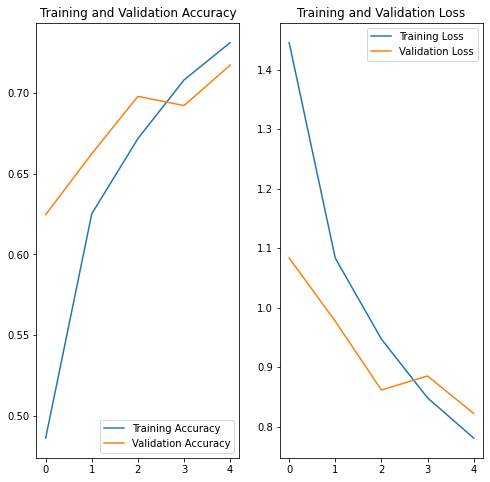

In [ ]:
plot_overfitting(elu_VGG_convnet.fit(x_train, y_train, validation_split=0.3, epochs=5),5)

In [ ]:
elu_VGG_convnet.evaluate(x_test, y_test)

313/313 [==============================] - 21s 67ms/step - loss: 0.8392 - accuracy: 0.7175


[0.8392298817634583, 0.7174999713897705]

# Selecting Optimizer Function


---



Since the VGG style architechure with the Elu activation performed the best, that activation will be used in further testing of the optizmer.

Multiple optimizers will be tested along the same model from the culmiation of previous steps to dertmine the best model with highest results. 

The Nadam optimizer was chosen as the optimzier with the best results

In [ ]:
#VGG Style architecture: 3 VGG Blocks and using an activation on each Conv2D layer
#Relu Activation
#SGD Optimizer

SGD_elu_VGG_convnet = models.Sequential([
                                  
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='elu', input_shape=(32, 32,3)),
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='elu'),
    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='elu'),
    layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
], name="VGG_with_Elu_and_SGD")

SGD_elu_VGG_convnet.compile(
    optimizer = optimizers.SGD(),
    loss = losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

Epoch 1/5
1094/1094 [==============================] - 304s 278ms/step - loss: 1.9186 - accuracy: 0.3005 - val_loss: 1.5890 - val_accuracy: 0.4369
Epoch 2/5
1094/1094 [==============================] - 303s 277ms/step - loss: 1.5017 - accuracy: 0.4580 - val_loss: 1.3476 - val_accuracy: 0.5208
Epoch 3/5
1094/1094 [==============================] - 303s 277ms/step - loss: 1.3056 - accuracy: 0.5337 - val_loss: 1.2244 - val_accuracy: 0.5691
Epoch 4/5
1094/1094 [==============================] - 303s 277ms/step - loss: 1.1672 - accuracy: 0.5887 - val_loss: 1.0804 - val_accuracy: 0.6213
Epoch 5/5
1094/1094 [==============================] - 302s 276ms/step - loss: 1.0632 - accuracy: 0.6271 - val_loss: 1.0100 - val_accuracy: 0.6443


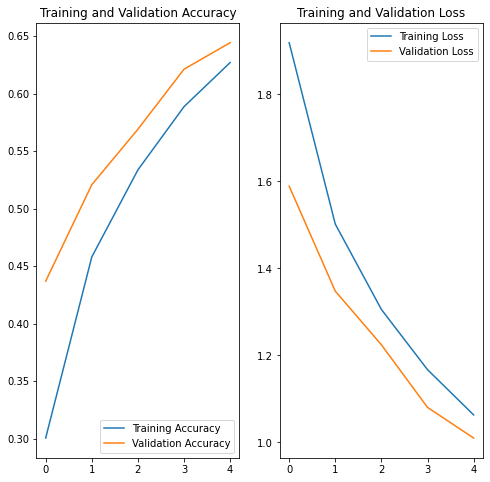

In [ ]:
plot_overfitting(SGD_elu_VGG_convnet.fit(x_train, y_train, validation_split=0.3, epochs=5),5)

In [ ]:
SGD_elu_VGG_convnet.evaluate(x_test, y_test)

313/313 [==============================] - 21s 66ms/step - loss: 1.0034 - accuracy: 0.6505


[1.0034009218215942, 0.6504999995231628]



---



In [ ]:
#VGG Style architecture: 3 VGG Blocks and using an activation on each Conv2D layer
#Relu Activation
#Adadelta Optimizer

adadelta_elu_VGG_convnet = models.Sequential([
                                  
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='elu', input_shape=(32, 32,3)),
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='elu'),
    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='elu'),
    layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
], name="VGG_with_Elu_and_Adadelta")

adadelta_elu_VGG_convnet.compile(
    optimizer = optimizers.Adadelta(),
    loss = losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

Epoch 1/5
1094/1094 [==============================] - 306s 279ms/step - loss: 2.3044 - accuracy: 0.1133 - val_loss: 2.2798 - val_accuracy: 0.1624
Epoch 2/5
1094/1094 [==============================] - 306s 279ms/step - loss: 2.2725 - accuracy: 0.1538 - val_loss: 2.2508 - val_accuracy: 0.2188
Epoch 3/5
1094/1094 [==============================] - 306s 280ms/step - loss: 2.2383 - accuracy: 0.1964 - val_loss: 2.2107 - val_accuracy: 0.2641
Epoch 4/5
1094/1094 [==============================] - 305s 279ms/step - loss: 2.1892 - accuracy: 0.2312 - val_loss: 2.1553 - val_accuracy: 0.2825
Epoch 5/5
1094/1094 [==============================] - 306s 280ms/step - loss: 2.1329 - accuracy: 0.2505 - val_loss: 2.0956 - val_accuracy: 0.2955


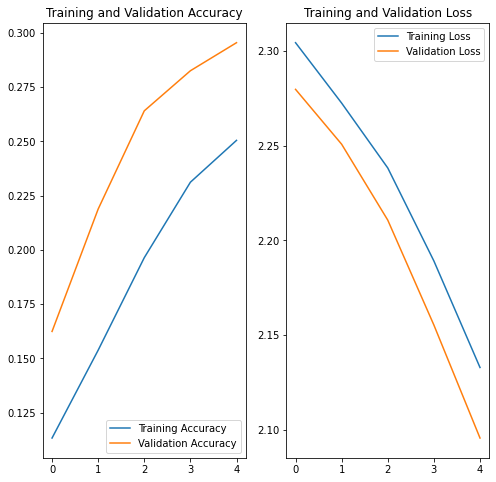

In [ ]:
plot_overfitting(adadelta_elu_VGG_convnet.fit(x_train, y_train, validation_split=0.3, epochs=5),5)

In [ ]:
adadelta_elu_VGG_convnet.evaluate(x_test, y_test)

313/313 [==============================] - 21s 66ms/step - loss: 2.0939 - accuracy: 0.2984


[2.093881845474243, 0.29840001463890076]



---



In [ ]:
#VGG Style architecture: 3 VGG Blocks and using an activation on each Conv2D layer
#Relu Activation
#Nadam Optimizer

nadam_elu_VGG_convnet = models.Sequential([
                                  
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='elu', input_shape=(32, 32,3)),
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='elu'),
    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='elu'),
    layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
], name="VGG_with_Elu_and_Nadam")

nadam_elu_VGG_convnet.compile(
    optimizer = optimizers.Nadam(),
    loss = losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

Epoch 1/5
1094/1094 [==============================] - 323s 294ms/step - loss: 1.4312 - accuracy: 0.4964 - val_loss: 1.1068 - val_accuracy: 0.6145
Epoch 2/5
1094/1094 [==============================] - 323s 296ms/step - loss: 1.0452 - accuracy: 0.6389 - val_loss: 0.9287 - val_accuracy: 0.6779
Epoch 3/5
1094/1094 [==============================] - 323s 295ms/step - loss: 0.9054 - accuracy: 0.6859 - val_loss: 0.8781 - val_accuracy: 0.6905
Epoch 4/5
1094/1094 [==============================] - 323s 296ms/step - loss: 0.8079 - accuracy: 0.7187 - val_loss: 0.8083 - val_accuracy: 0.7199
Epoch 5/5
1094/1094 [==============================] - 323s 295ms/step - loss: 0.7292 - accuracy: 0.7466 - val_loss: 0.8272 - val_accuracy: 0.7220


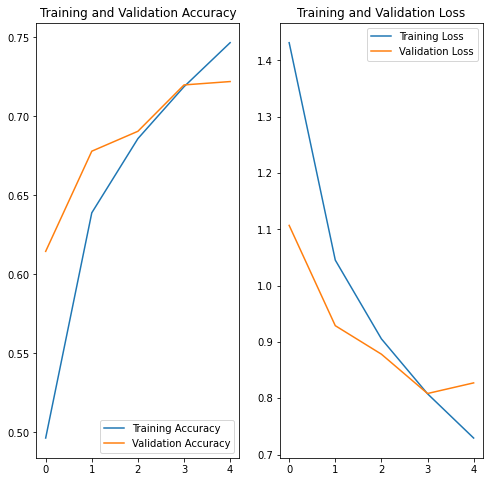

In [ ]:
plot_overfitting(nadam_elu_VGG_convnet.fit(x_train, y_train, validation_split=0.3, epochs=5),5)

In [ ]:
nadam_elu_VGG_convnet.evaluate(x_test, y_test)

313/313 [==============================] - 21s 67ms/step - loss: 0.8451 - accuracy: 0.7196


[0.8450907468795776, 0.7196000218391418]

# Longer Test on the Final Model


---



The model that has so far produced the best results consists of:


*   VGG Architechture
*   Elu Activation
*   Nadam Optimzier
*   And was run on 5 epochs

To further evaluate this model we will recreate the model and evaluate it at a much higher epochs to determine when the accuracy begins to plateau.



In [ ]:
#Equivalent model as the nadam_elu_VGG_convnet model, but this will run for 15 epochs
model_a = models.Sequential([
                                  
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='elu', input_shape=(32, 32,3)),
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='elu'),
    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='elu'),
    layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
], name="Model_a")

model_a.compile(
    optimizer = optimizers.Nadam(),
    loss = losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

Epoch 1/15
1094/1094 [==============================] - 274s 249ms/step - loss: 1.4308 - accuracy: 0.4923 - val_loss: 1.1232 - val_accuracy: 0.6111
Epoch 2/15
1094/1094 [==============================] - 272s 249ms/step - loss: 1.0500 - accuracy: 0.6364 - val_loss: 0.9425 - val_accuracy: 0.6702
Epoch 3/15
1094/1094 [==============================] - 272s 249ms/step - loss: 0.9058 - accuracy: 0.6868 - val_loss: 0.8726 - val_accuracy: 0.6971
Epoch 4/15
1094/1094 [==============================] - 272s 249ms/step - loss: 0.8122 - accuracy: 0.7184 - val_loss: 0.8440 - val_accuracy: 0.7113
Epoch 5/15
1094/1094 [==============================] - 275s 251ms/step - loss: 0.7408 - accuracy: 0.7429 - val_loss: 0.8085 - val_accuracy: 0.7263
Epoch 6/15
1094/1094 [==============================] - 277s 253ms/step - loss: 0.6776 - accuracy: 0.7655 - val_loss: 0.7866 - val_accuracy: 0.7389
Epoch 7/15
1094/1094 [==============================] - 277s 253ms/step - loss: 0.6235 - accuracy: 0.7826 - val_

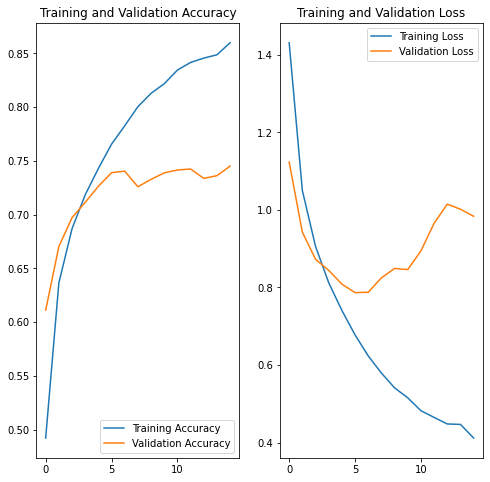

In [ ]:
plot_overfitting( (model_a.fit(x_train, y_train, validation_split=0.3, epochs=15)), 15)

In [ ]:
model_a.evaluate(x_test, y_test)

313/313 [==============================] - 22s 69ms/step - loss: 1.0741 - accuracy: 0.7363


[1.0741380453109741, 0.736299991607666]

As evident through the graphs of the accuracy and loss, overfitting is clearly an issue with this model.
Possible causes of overfitting are:


*   Long training time
*   Model is too complex -- Currently have 500k parameters for a 60 000 image dataset 

These are areas we will improve on next by reducing the model complexity and run for less epochs



# Attempting to Address the Overfitting Issues


---



In [ ]:
#Model to address the Overfitting issues:
#2 VGG Blocks, reduced the size of the Dense layers, and the position of the dropout layer

model_d1 = models.Sequential([
                                  
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='elu', input_shape=(32, 32,3)),
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='elu'),
    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(32),
    layers.Dense(10, activation='softmax')
], name="Model_d1")

model_d1.compile(
    optimizer = optimizers.Nadam(),
    loss = losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
model_d1.summary()

Model: "Model_d1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                     

Epoch 1/10
1094/1094 [==============================] - 206s 187ms/step - loss: 1.4248 - accuracy: 0.5028 - val_loss: 1.1597 - val_accuracy: 0.5928
Epoch 2/10
1094/1094 [==============================] - 205s 187ms/step - loss: 1.1162 - accuracy: 0.6165 - val_loss: 1.0467 - val_accuracy: 0.6461
Epoch 3/10
1094/1094 [==============================] - 204s 187ms/step - loss: 1.0406 - accuracy: 0.6417 - val_loss: 0.9967 - val_accuracy: 0.6578
Epoch 4/10
1094/1094 [==============================] - 211s 193ms/step - loss: 0.9939 - accuracy: 0.6577 - val_loss: 0.9777 - val_accuracy: 0.6661
Epoch 5/10
1094/1094 [==============================] - 210s 192ms/step - loss: 0.9473 - accuracy: 0.6738 - val_loss: 1.0056 - val_accuracy: 0.6611
Epoch 6/10
1094/1094 [==============================] - 210s 192ms/step - loss: 0.9172 - accuracy: 0.6863 - val_loss: 0.9414 - val_accuracy: 0.6835
Epoch 7/10
1094/1094 [==============================] - 210s 192ms/step - loss: 0.8806 - accuracy: 0.6950 - val_

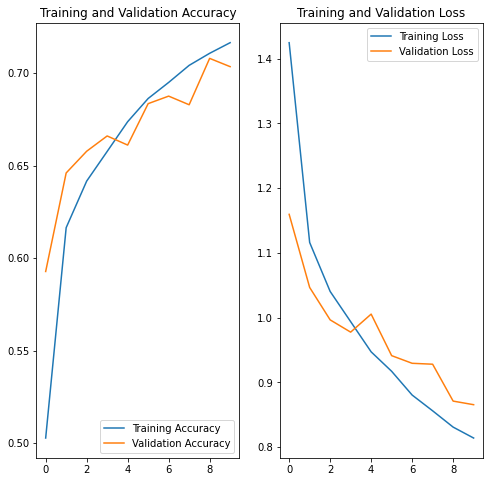

In [ ]:
plot_overfitting((model_d1.fit(x_train, y_train, validation_split=0.3, epochs=10)), 10)

In [ ]:
model_d1.evaluate(x_test, y_test)

313/313 [==============================] - 15s 47ms/step - loss: 0.8692 - accuracy: 0.7032


[0.8692370057106018, 0.7031999826431274]

# Deployment

---

This model will now be tested on unseen data, to see what label is predicted vs what the true label is

We will be using the testing data as this model has not yet been exposed to it. We will select a random 10 images from test set and see the comparison

In [ ]:
#Equivalent model as the model_d1 model, but this will ONLY be trained
#The live deployment will use the test data set to perform predictions and for us to analyze live on video

model_deploy = models.Sequential([
    
                                  
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='elu', input_shape=(32, 32,3)),
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='elu'),
    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='elu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(32),
    layers.Dense(10, activation='softmax')
], name="Model_deploy")

model_deploy.compile(
    optimizer = optimizers.Nadam(),
    loss = losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
model_deploy.fit(x_train, y_train, validation_split=0.3, epochs=10)

Epoch 1/10
1094/1094 [==============================] - 223s 203ms/step - loss: 1.4130 - accuracy: 0.5028 - val_loss: 1.0951 - val_accuracy: 0.6192
Epoch 2/10
1094/1094 [==============================] - 222s 203ms/step - loss: 1.1250 - accuracy: 0.6107 - val_loss: 1.1053 - val_accuracy: 0.6179
Epoch 3/10
1094/1094 [==============================] - 218s 199ms/step - loss: 1.0454 - accuracy: 0.6402 - val_loss: 1.0425 - val_accuracy: 0.6410
Epoch 4/10
1094/1094 [==============================] - 221s 202ms/step - loss: 0.9899 - accuracy: 0.6593 - val_loss: 0.9934 - val_accuracy: 0.6571
Epoch 5/10
1094/1094 [==============================] - 221s 202ms/step - loss: 0.9525 - accuracy: 0.6726 - val_loss: 0.9558 - val_accuracy: 0.6723
Epoch 6/10
1094/1094 [==============================] - 220s 201ms/step - loss: 0.9148 - accuracy: 0.6849 - val_loss: 0.9833 - val_accuracy: 0.6591
Epoch 7/10
1094/1094 [==============================] - 221s 202ms/step - loss: 0.8857 - accuracy: 0.6928 - val_

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
rand_int = np.random.randint(10,900)

In [ ]:
print(rand_int)

135


In [ ]:
#Select 10 images from the test dataset
#Indexing from the random int, up to random_int + 10

RESULTS = model_deploy(x_test[rand_int:rand_int + 10]).numpy()

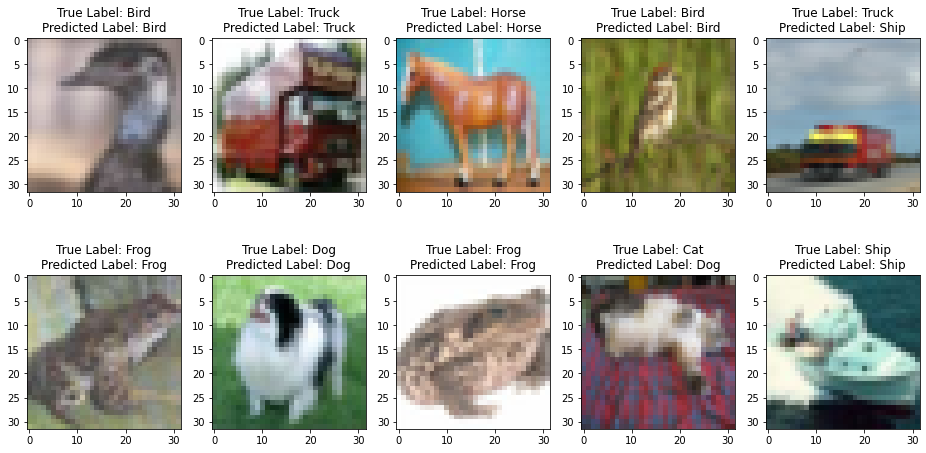

In [ ]:
#Plot the image, along with the predicted label provided from our model with the true label

plt.figure(figsize=(16, 8))
for i in range(len(RESULTS)):
    plt.subplot(2, len(RESULTS)/2, i+1)
    plt.imshow(x_test[i + rand_int])

    #TRUE LABEL
    plt.title(("True Label: " + labels[int(y_test[i + rand_int])] + "\n" + "Predicted Label: " + labels[np.argmax(RESULTS[i])]))

# Conclusion

---
As stated in the slides and in our video, this model has a good accuracy of just above 70% but not great and has lots of room for improvement.

Next Steps Beyond this Project:


*   Conduct further experiemtnal studies on the other variables of this model such as the kernel size, window size, learning rate, etc. 
*   Improve the overall accuracy of this model to be better suited for real life deployment
*   Test the model out on other datasets, of different sizes


